In [ ]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [ ]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [ ]:
cohort = "experimental"             # cohort name

data_method = "data_beta"           # method name
eval_method = "eval_nominal"        # method name

scene = "mid_gate"                  # scene name

courses = [                         # course names
    "robustness_track",
    ]   

roster = [
    "Maverick",                     # sifu_testbed
    "Rooster",                      # sift_testbed
    ]

Neps_sw = 10                        # step-wise number of epochs
Neps_hN = 200                        # histNet number of epochs 
Neps_cN = 200                       # commNet number of epochs

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)
# ps.plot_rollout_data(cohort,show_3D=False,show_time=False)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

In [ ]:
# First Stage Training
tp.train_roster(cohort,roster,"histNet",Neps_sw,regen=False)

for i in range(10):
    tp.train_roster(cohort,roster,"commNet",Neps_sw,regen=True,use_deploy=scene)

pl.plot_losses(cohort,roster,"histNet")
pl.plot_losses(cohort,roster,"commNet")


======================================================================
Cohort : experimental
Network: histNet
====================================================================== 
----------------------------------------------------------------------
Student: Maverick | Epochs: 200   | Data Size: 12250/875
Time: 0h 3m 42s   | Train: 0.8709 | Test: 0.9684 | Eval TTE: 3147.13 
----------------------------------------------------------------------
Student: Rooster  | Epochs: 100   | Data Size: 12250/875
Time: 0h 2m 31s   | Train: 0.5526 | Test: 0.6568 | Eval TTE: 128.77 
======================================================================

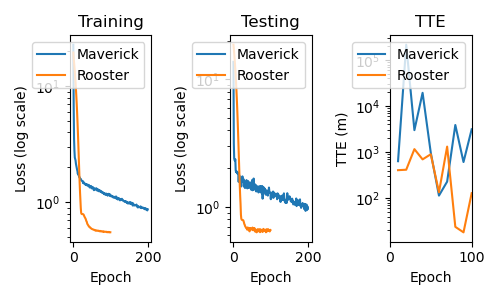

======================================================================
Cohort : experimental
Network: commNet
====================================================================== 
----------------------------------------------------------------------
Student: Maverick | Epochs: 200   | Data Size: 12250/875
Time: 0h 36m 37s  | Train: 0.0023 | Test: 0.0120 | Eval TTE: 80912.50 
----------------------------------------------------------------------
Student: Rooster  | Epochs: 200   | Data Size: 12250/875
Time: 0h 36m 31s  | Train: 0.0021 | Test: 0.0104 | Eval TTE: 7.01 
======================================================================

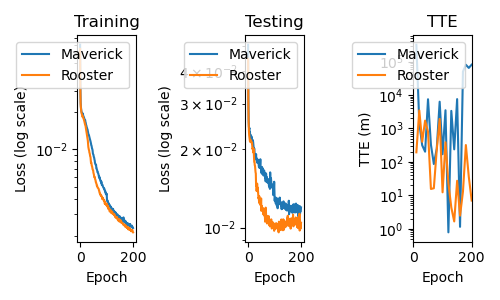

In [29]:
# # # Train the Networks Incrementally
# tp.train_roster(cohort,["Maverick"],"histNet",100,regen=False)

# og.generate_observation_data(cohort,roster)

# for i in range(10):
#     tp.train_roster(cohort,roster,"commNet",Neps_sw,regen=False,use_deploy=scene)

pl.plot_losses(cohort,roster,"histNet")
pl.plot_losses(cohort,roster,"commNet")

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster)
    pl.plot_deployments(cohort,course,roster,plot_show=True)